In [83]:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from string import ascii_letters
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_auc_score, roc_curve, auc, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
import category_encoders as ce
from scipy import stats
from sklearn.tree import DecisionTreeClassifier



import matplotlib


In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# __1. Data Preprocessing__

In [3]:
nba = pd.read_csv('nba_players.csv')

In [4]:
nba= nba.set_index('Unnamed: 0.1')


In [5]:
nba = nba.set_index('Unnamed: 0')

In [6]:
nba

player_name team_abbreviation   age  player_height  \
Unnamed: 0                                                              
0                Dennis Rodman               CHI  36.0         198.12   
1            Dwayne Schintzius               LAC  28.0         215.90   
2                 Earl Cureton               TOR  39.0         205.74   
3                  Ed O'Bannon               DAL  24.0         203.20   
4                  Ed Pinckney               MIA  34.0         205.74   
...                        ...               ...   ...            ...   
11140              Maxi Kleber               DAL  28.0         208.28   
11141       Melvin Frazier Jr.               ORL  23.0         195.58   
11142           Meyers Leonard               MIA  28.0         213.36   
11143             Norvel Pelle               PHI  27.0         208.28   
11144              Matt Thomas               TOR  25.0         193.04   

            player_weight                      college  country draft_year  \
Unnamed: 0                                                                   
0               99.790240  Southeastern Oklahoma State      USA       1986   
1              117.933920                      Florida      USA       1990   
2               95.254320                Detroit Mercy      USA       1979   
3              100.697424                         UCLA      USA       1995   
4              108.862080                    Villanova      USA       1985   
...                   ...                          ...      ...        ...   
11140          108.862080                         None  Germany  Undrafted   
11141           97.522280                       Tulane      USA       2018   
11142          117.933920                     Illinois      USA       2012   
11143          104.779752                         None      USA  Undrafted   
11144           86.182480                   Iowa State      USA  Undrafted   

           draft_round draft_number  gp  pts   reb  ast  net_rating  oreb_pct  \
Unnamed: 0                                                                      
0                    2           27  55  5.7  16.1  3.1        16.1     0.186   
1                    1           24  15  2.3   1.5  0.3        12.3     0.078   
2                    3           58   9  0.8   1.0  0.4        -2.1     0.105   
3                    1            9  64  3.7   2.3  0.6        -8.7     0.060   
4                    1           10  27  2.4   2.4  0.2       -11.2     0.109   
...                ...          ...  ..  ...   ...  ...         ...       ...   
11140        Undrafted    Undrafted  63  9.1   5.4  1.1         4.6     0.056   
11141                2           35  15  1.2   0.3  0.1        -2.4     0.018   
11142                1           11  49  6.1   5.1  1.1         5.6     0.029   
11143        Undrafted    Undrafted  20  2.1   3.0  0.4       -16.4     0.085   
11144        Undrafted    Undrafted  31  4.5   1.4  0.5         1.0     0.017   

            dreb_pct  usg_pct  ts_pct  ast_pct   season  potential_player  
Unnamed: 0                                                                 
0              0.323    0.100   0.479    0.113  1996-97                 0  
1              0.151    0.175   0.430    0.048  1996-97                 0  
2              0.102    0.103   0.376    0.148  1996-97                 0  
3              0.149    0.167   0.399    0.077  1996-97                 0  
4              0.179    0.127   0.611    0.040  1996-97                 0  
...              ...      ...     ...      ...      ...               ...  
11140          0.140    0.136   0.605    0.064  2019-20                 0  
11141          0.058    0.164   0.480    0.033  2019-20                 0  
11142          0.217    0.120   0.640    0.076  2019-20                 0  
11143          0.237    0.126   0.521    0.056  2019-20                 0  
11144          0.104    0.149   0.663    0.089  2019-20                 0  

[11145 rows

In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [8]:
nba.isna().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

In [9]:
nba.describe()

age  player_height  player_weight            gp           pts  \
count  11145.000000   11145.000000   11145.000000  11145.000000  11145.000000   
mean      27.168686     200.812818     100.637868     52.005832      8.126487   
std        4.344164       9.190973      12.576295     25.069495      5.935482   
min       18.000000     160.020000      60.327736      1.000000      0.000000   
25%       24.000000     195.580000      90.718400     32.000000      3.500000   
50%       27.000000     200.660000      99.790240     58.000000      6.600000   
75%       30.000000     208.280000     109.315672     74.000000     11.500000   
max       44.000000     231.140000     163.293120     85.000000     36.100000   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  11145.000000  11145.000000  11145.000000  11145.000000  11145.000000   
mean       3.560036      1.801463     -2.153899      0.055593      0.141772   
std        2.495394      1.789940     12.150611      0.043889      0.063194   
min        0.000000      0.000000   -200.000000      0.000000      0.000000   
25%        1.800000      0.600000     -6.300000      0.022000      0.096000   
50%        3.000000      1.200000     -1.300000      0.043000      0.132000   
75%        4.700000      2.400000      3.200000      0.086000      0.182000   
max       16.300000     11.700000    300.000000      1.000000      1.000000   

            usg_pct        ts_pct       ast_pct  potential_player  
count  11145.000000  11145.000000  11145.000000      11145.000000  
mean       0.185599      0.508099      0.131078          0.040825  
std        0.053047      0.098879      0.095017          0.197895  
min        0.000000      0.000000      0.000000          0.000000  
25%        0.150000      0.478000      0.065000          0.000000  
50%        0.182000      0.521000      0.102000          0.000000  
75%        0.218000      0.557000      0.178000          0.000000  
max        1.000000      1.500000      1.000000          1.000000

In [10]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [11]:
calc_vif(nba[['age', 'player_height', 'player_weight','gp', 'pts', 'reb','ast','net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']])

variables         VIF
0             age   41.595580
1   player_height  284.634827
2   player_weight  207.917918
3              gp    9.077819
4             pts   22.305167
5             reb   15.616245
6             ast   12.611830
7      net_rating    1.208323
8        oreb_pct    5.452024
9        dreb_pct   15.559180
10        usg_pct   32.017284
11         ts_pct   36.281833
12        ast_pct   12.717154

## based on the variance inflation factor of the variables above, it can be concluded that except for net_rating all of the features above are highly collinear so it will be reduced using Principal Component Analysis

In [12]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    null_values = []
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        null_values.append(df[i].isna().sum())
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques, 'null_values': null_values})

In [13]:
report(nba)

Column   d_type  \
0         player_name   object   
1   team_abbreviation   object   
2                 age  float64   
3       player_height  float64   
4       player_weight  float64   
5             college   object   
6             country   object   
7          draft_year   object   
8         draft_round   object   
9        draft_number   object   
10                 gp    int64   
11                pts  float64   
12                reb  float64   
13                ast  float64   
14         net_rating  float64   
15           oreb_pct  float64   
16           dreb_pct  float64   
17            usg_pct  float64   
18             ts_pct  float64   
19            ast_pct  float64   
20             season   object   
21   potential_player    int64   

                                        unique_sample  n_uniques  null_values  
0   [Dennis Rodman, Dwayne Schintzius, Earl Cureto...       2235            0  
1                           [CHI, LAC, TOR, DAL, MIA]         36            0  
2                      [36.0, 28.0, 39.0, 24.0, 34.0]         27            0  
3              [198.12, 215.9, 205.74, 203.2, 200.66]         30            0  
4   [99.79024, 117.93392, 95.25432, 100.697424, 10...        157            0  
5   [Southeastern Oklahoma State, Florida, Detroit...        316            0  
6            [USA, Congo, Nigeria, Lithuania, Canada]         76            0  
7                      [1986, 1990, 1979, 1995, 1985]         45            0  
8                             [2, 1, 3, Undrafted, 4]          8            0  
9                                 [27, 24, 58, 9, 10]         75            0  
10                                [55, 15, 9, 64, 27]         85            0  
11                          [5.7, 2.3, 0.8, 3.7, 2.4]        308            0  
12                         [16.1, 1.5, 1.0, 2.3, 2.4]        154            0  
13                          [3.1, 0.3, 0.4, 0.6, 0.2]        114            0  
14                    [16.1, 12.3, -2.1, -8.7, -11.2]        707            0  
15   [0.18600000000000005, 0.078, 0.105, 0.06, 0.109]        216            0  
16  [0.32299999999999995, 0.151, 0.102, 0.149, 0.179]        351            0  
17  [0.1, 0.175, 0.10300000000000001, 0.1669999999...        341            0  
18   [0.479, 0.43, 0.376, 0.39899999999999997, 0.611]        529            0  
19   [0.113, 0.048, 0.14800000000000002, 0.077, 0.04]        479            0  
20      [1996-97, 1997-98, 1998-99, 1999-00, 2000-01]         24            0  
21                                             [0, 1]          2            0

### We need to encode country and college using binary encoders since there are too many unique values

### i will drop the columns player_name team_abbreviation draft_year draft_round draft_number season since these are not included in the new_players.csv

## I will also be dropping college and country since it has too many unique values which will impact the duration of the modelling

### From the information above there are no missing values or null, but columns with 'draft' in its titles contain 'undrafted' as their values but this is not a useful information since we will be dropping these columns anyway 





In [14]:
nba['potential_player'].value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


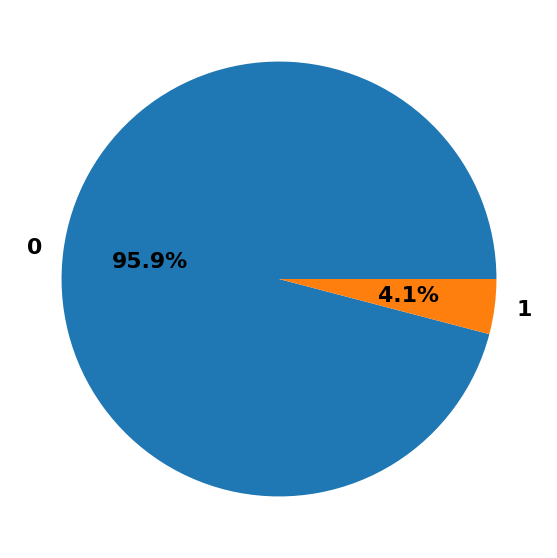

In [15]:
plt.figure(figsize=(10,10))


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


plt.pie(nba['potential_player'].value_counts() , labels=[0,1], autopct='%1.1f%%')

plt.show()

#### This is a highly imbalanced data so resampling is necessary

In [16]:
new_players = pd.read_csv('new_players.csv')
new_players.set_index('Unnamed: 0').columns

Index(['player_id', 'age', 'player_height', 'player_weight', 'college',
       'country', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

In [17]:
nba.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

## __2. EDA__

In [18]:
report(nba)

Column   d_type  \
0         player_name   object   
1   team_abbreviation   object   
2                 age  float64   
3       player_height  float64   
4       player_weight  float64   
5             college   object   
6             country   object   
7          draft_year   object   
8         draft_round   object   
9        draft_number   object   
10                 gp    int64   
11                pts  float64   
12                reb  float64   
13                ast  float64   
14         net_rating  float64   
15           oreb_pct  float64   
16           dreb_pct  float64   
17            usg_pct  float64   
18             ts_pct  float64   
19            ast_pct  float64   
20             season   object   
21   potential_player    int64   

                                        unique_sample  n_uniques  null_values  
0   [Dennis Rodman, Dwayne Schintzius, Earl Cureto...       2235            0  
1                           [CHI, LAC, TOR, DAL, MIA]         36            0  
2                      [36.0, 28.0, 39.0, 24.0, 34.0]         27            0  
3              [198.12, 215.9, 205.74, 203.2, 200.66]         30            0  
4   [99.79024, 117.93392, 95.25432, 100.697424, 10...        157            0  
5   [Southeastern Oklahoma State, Florida, Detroit...        316            0  
6            [USA, Congo, Nigeria, Lithuania, Canada]         76            0  
7                      [1986, 1990, 1979, 1995, 1985]         45            0  
8                             [2, 1, 3, Undrafted, 4]          8            0  
9                                 [27, 24, 58, 9, 10]         75            0  
10                                [55, 15, 9, 64, 27]         85            0  
11                          [5.7, 2.3, 0.8, 3.7, 2.4]        308            0  
12                         [16.1, 1.5, 1.0, 2.3, 2.4]        154            0  
13                          [3.1, 0.3, 0.4, 0.6, 0.2]        114            0  
14                    [16.1, 12.3, -2.1, -8.7, -11.2]        707            0  
15   [0.18600000000000005, 0.078, 0.105, 0.06, 0.109]        216            0  
16  [0.32299999999999995, 0.151, 0.102, 0.149, 0.179]        351            0  
17  [0.1, 0.175, 0.10300000000000001, 0.1669999999...        341            0  
18   [0.479, 0.43, 0.376, 0.39899999999999997, 0.611]        529            0  
19   [0.113, 0.048, 0.14800000000000002, 0.077, 0.04]        479            0  
20      [1996-97, 1997-98, 1998-99, 1999-00, 2000-01]         24            0  
21                                             [0, 1]          2            0

<AxesSubplot:>

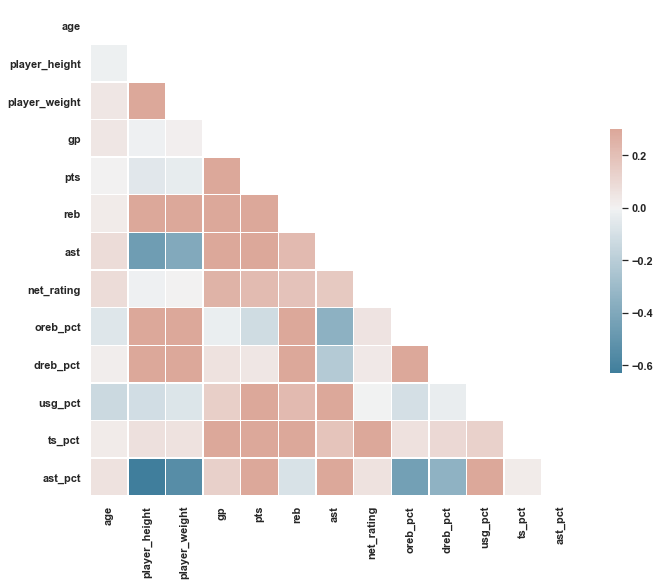

In [19]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = nba.drop('potential_player',axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## This shows that height and weight are highly correlated with rebound performances (tall people rebound better), yet the taller you are the worse you get at assisting , as you can see that height and weight are negatively correlated with ast scores.

C:\Users\Fachri Ardiansyah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fachri Ardiansyah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


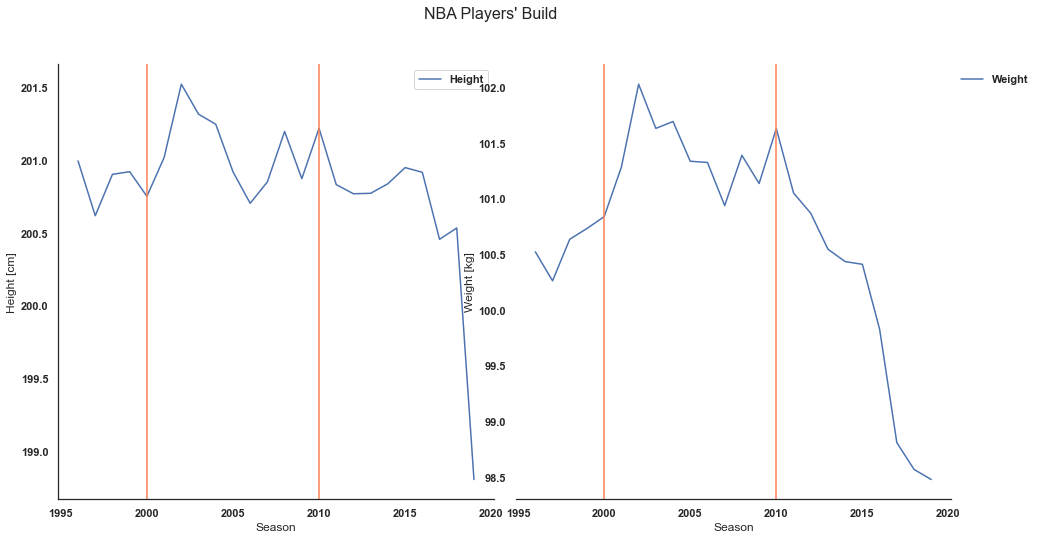

In [20]:
byYear_height = nba.groupby("season").mean()["player_height"]
byYear_weight = nba.groupby("season").mean()["player_weight"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(1,2,figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,byYear_height.values, ax=ax[0], label='Height')
sns.lineplot(season_list,byYear_weight.values, ax=ax[1], label='Weight')

# Add lines for different eras
ax[0].axvline(2000, color='#FF7F50')
ax[0].axvline(2010, color='#FF7F50')

ax[1].axvline(2000, color='#FF7F50')
ax[1].axvline(2010, color='#FF7F50')


ax[0].yaxis.set_label_text('Height [cm]')
ax[1].yaxis.set_label_text('Weight [kg]')
ax[0].xaxis.set_label_text('Season')
ax[1].xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Build", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()

## This shows that these days player are getting more athletic since the weight are decreasing, gradual decrease of height also implies that teams are smartly utilizing shorter players for different tyes of positions

In [21]:
a = nba['country'].value_counts()

In [22]:
a.index


Index(['USA', 'France', 'Canada', 'Spain', 'Brazil', 'Australia', 'Slovenia',
       'Turkey', 'Croatia', 'Argentina', 'Lithuania', 'Serbia', 'Germany',
       'Ukraine', 'Russia', 'Italy', 'Senegal', 'Serbia and Montenegro',
       'Democratic Republic of the Congo', 'Montenegro', 'Puerto Rico',
       'Dominican Republic', 'Georgia', 'Nigeria', 'Greece', 'Latvia',
       'Switzerland', 'Cameroon', 'Netherlands', 'US Virgin Islands',
       'United Kingdom', 'New Zealand', 'Mexico', 'China', 'Poland', 'Haiti',
       'Congo', 'Sweden', 'U.S. Virgin Islands', 'Israel', 'Jamaica',
       'St. Vincent & Grenadines', 'Czech Republic', 'Yugoslavia', 'Venezuela',
       'England', 'Belize', 'Bosnia', 'Bahamas', 'Mali', 'Finland',
       'Bosnia and Herzegovina', 'Tanzania', 'South Sudan', 'Iran', 'Austria',
       'Tunisia', 'Japan', 'Egypt', 'Ireland', 'Great Britain',
       'Bosnia & Herzegovina', 'Panama', 'Scotland', 'Macedonia', 'Gabon',
       'Cabo Verde', 'South Korea', 'Uruguay', 

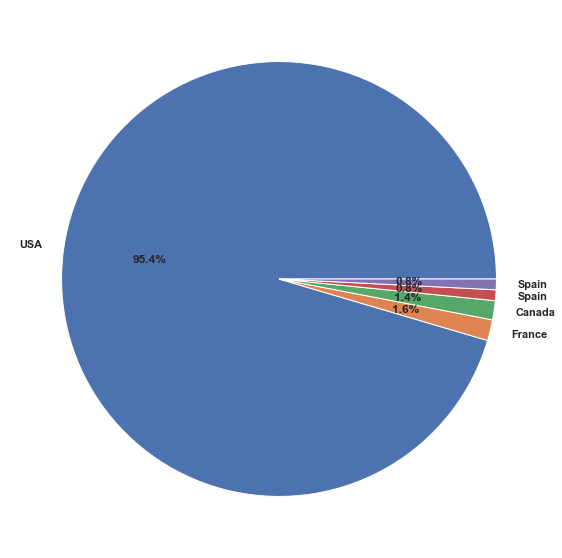

In [23]:
plt.figure(figsize=(10,10))
plt.pie(nba['country'].value_counts()[:5], labels=['USA', 'France', 'Canada', 'Spain', 'Spain'], autopct='%1.1f%%')
plt.show()

# This shows that NBA players are still mainly from usa

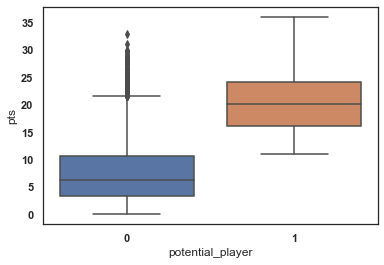

In [24]:
sns.boxplot(x='potential_player',y='pts',data=nba)
plt.show()

# This shows that potential players usually score points higher than those who are not

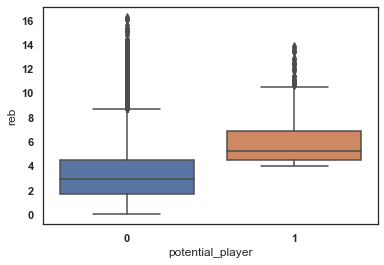

In [25]:
sns.boxplot(x='potential_player',y='reb',data=nba)
plt.show()

# This shows that potential players usually rebounds more often than those who are not

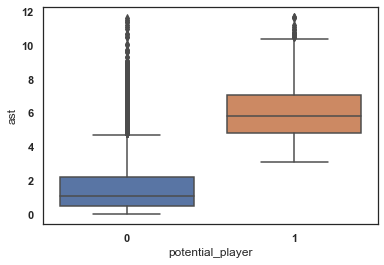

In [26]:
sns.boxplot(x='potential_player',y='ast',data=nba)
plt.show()

# This also shows that potential players are better assists

# __3. Data Splitting__

In [33]:
nba_model = nba.drop(['player_name', 'team_abbreviation', 'draft_year',  'draft_round', 'draft_number', 'season', 'college', 'country'], axis=1)
X = nba_model.drop(columns='potential_player')
y = nba_model['potential_player']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=.2, stratify=y, random_state=2020)

## remember that 'age', 'player_height', 'player_weight','gp', 'pts', 'reb','ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct' are highly correlated according to its vif score so we will be using pca


## __4. Benchmark Models__
we will be using decision tree and random forest

In [34]:

dtc = DecisionTreeClassifier(max_depth=3)
rfc = RandomForestClassifier(max_depth=3)

In [35]:
smote= SMOTE()

diperlukan smote karena data imbalanced

## __Pipeline__

In [55]:

dtc_pipe = Pipeline([
    ('rfe', RFE(dtc)),
    ('resampling', smote),
    ('dtc', dtc)
])

#  Random Forest
rfc_pipe = Pipeline([
    ('rfe', RFE(rfc)),
    ('resampling', smote),
    ('rfc', rfc)
])

In [47]:
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2020)

rfc_score = cross_val_score(rfc_pipe, X_train_val, y_train_val, scoring='precision', cv=rskf, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(dtc_pipe, X_train_val, y_train_val, scoring='precision', cv=rskf, n_jobs=-1, verbose=1)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


## We will be using precision as metric because of the financial crisis the club is currently experiencing so we want false positives in the model as few as possible, therefore we need a high precision score

In [48]:
print('Random forest Score is' , rfc_score.mean())
print('Decision Tree Score is', dtc_score.mean())

Random forest Score is 0.9670894219448671
Decision Tree Score is 0.8316576021420221


## in this case Random Forest Classifier has greater precision score so we will be using random forest classifier

# __5.Model Improvement__

## RFC Tuning

In [49]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('rfe', RFE(estimator=RandomForestClassifier(max_depth=3))),
  ('resampling', SMOTE()),
  ('rfc', RandomForestClassifier(max_depth=3))],
 'verbose': False,
 'rfe': RFE(estimator=RandomForestClassifier(max_depth=3)),
 'resampling': SMOTE(),
 'rfc': RandomForestClassifier(max_depth=3),
 'rfe__estimator__bootstrap': True,
 'rfe__estimator__ccp_alpha': 0.0,
 'rfe__estimator__class_weight': None,
 'rfe__estimator__criterion': 'gini',
 'rfe__estimator__max_depth': 3,
 'rfe__estimator__max_features': 'auto',
 'rfe__estimator__max_leaf_nodes': None,
 'rfe__estimator__max_samples': None,
 'rfe__estimator__min_impurity_decrease': 0.0,
 'rfe__estimator__min_impurity_split': None,
 'rfe__estimator__min_samples_leaf': 1,
 'rfe__estimator__min_samples_split': 2,
 'rfe__estimator__min_weight_fraction_leaf': 0.0,
 'rfe__estimator__n_estimators': 100,
 'rfe__estimator__n_jobs': None,
 'rfe__estimator__oob_score': False,
 'rfe__estimator__random_state': None,
 'rfe__estimator

In [57]:
rfc_params = {
    'rfc__max_depth': np.arange(10,16),
    'rfc__min_samples_split': np.arange(7,10)
}


In [69]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
rfc_grid = GridSearchCV(rfc_pipe, param_grid=rfc_params, scoring='precision', cv=skf, verbose=1, n_jobs=-1)
rfc_grid.fit(X_train_val, y_train_val)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=RandomForestClassifier(max_depth=3))),
                                       ('resampling', SMOTE()),
                                       ('rfc',
                                        RandomForestClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': array([10, 11, 12, 13, 14, 15]),
                         'rfc__min_samples_split': array([7, 8, 9])},
             scoring='precision', verbose=1)

In [70]:
rfc_tuned = rfc_grid.best_estimator_
rfc_tuned_score = cross_val_score(rfc_tuned, X_train_val, y_train_val, scoring='precision', cv=rskf, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


array([0.96052632, 0.97297297, 1.        , 0.98611111, 0.98648649,
       0.97297297, 0.98630137, 0.97333333, 0.98648649, 0.98630137,
       0.96052632, 0.95945946, 0.98611111, 1.        , 1.        ,
       0.96052632, 1.        , 0.98630137, 0.97333333, 0.98648649,
       0.98648649, 0.97297297, 0.97333333, 0.98611111, 0.98648649,
       0.98630137, 0.97183099, 0.98648649, 0.96052632, 1.        ,
       1.        , 0.94736842, 0.98630137, 0.98630137, 0.98630137,
       0.97297297, 0.97297297, 0.98648649, 0.98648649, 0.98611111,
       0.98630137, 0.97297297, 0.97260274, 0.98648649, 0.98648649,
       0.98648649, 0.97297297, 0.97333333, 0.98648649, 0.98591549])

In [122]:
rfc_score.mean()

0.9670894219448671

In [71]:
rfc_tuned_score.mean()

0.9811223949519956

# terlihat disini bahwa score naik dari 0.96 ke 0.98

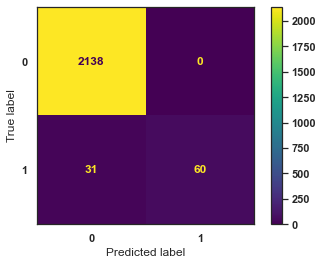

In [132]:
rfc.fit(X_train_val, y_train_val)
plot_confusion_matrix(rfc, X_test, y_test)

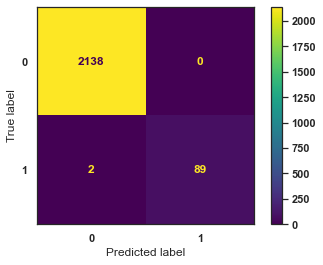

In [76]:
rfc_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(rfc_tuned, X_test, y_test)

ada kenaikan True Positive dari model hasil tuning

## DTC TUNING

In [124]:
dtc_pipe.get_params()

{'memory': None,
 'steps': [('rfe', RFE(estimator=DecisionTreeClassifier(max_depth=3))),
  ('resampling', SMOTE()),
  ('dtc', DecisionTreeClassifier(max_depth=3))],
 'verbose': False,
 'rfe': RFE(estimator=DecisionTreeClassifier(max_depth=3)),
 'resampling': SMOTE(),
 'dtc': DecisionTreeClassifier(max_depth=3),
 'rfe__estimator__ccp_alpha': 0.0,
 'rfe__estimator__class_weight': None,
 'rfe__estimator__criterion': 'gini',
 'rfe__estimator__max_depth': 3,
 'rfe__estimator__max_features': None,
 'rfe__estimator__max_leaf_nodes': None,
 'rfe__estimator__min_impurity_decrease': 0.0,
 'rfe__estimator__min_impurity_split': None,
 'rfe__estimator__min_samples_leaf': 1,
 'rfe__estimator__min_samples_split': 2,
 'rfe__estimator__min_weight_fraction_leaf': 0.0,
 'rfe__estimator__presort': 'deprecated',
 'rfe__estimator__random_state': None,
 'rfe__estimator__splitter': 'best',
 'rfe__estimator': DecisionTreeClassifier(max_depth=3),
 'rfe__n_features_to_select': None,
 'rfe__step': 1,
 'rfe__verbo

In [125]:
dtc_params = {
    'dtc__max_depth': np.arange(10,16),
    'dtc__min_samples_split': np.arange(7,10)
}


In [126]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
dtc_grid = GridSearchCV(dtc_pipe, param_grid=dtc_params, scoring='precision', cv=skf, verbose=1, n_jobs=-1)
dtc_grid.fit(X_train_val, y_train_val)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=DecisionTreeClassifier(max_depth=3))),
                                       ('resampling', SMOTE()),
                                       ('dtc',
                                        DecisionTreeClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'dtc__max_depth': array([10, 11, 12, 13, 14, 15]),
                         'dtc__min_samples_split': array([7, 8, 9])},
             scoring='precision', verbose=1)

In [127]:
dtc_tuned = dtc_grid.best_estimator_
dtc_tuned_score = cross_val_score(dtc_tuned, X_train_val, y_train_val, scoring='precision', cv=rskf, n_jobs=-1, verbose=1)
dtc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


array([0.95774648, 0.95945946, 0.97297297, 0.98591549, 0.98648649,
       0.96      , 0.95774648, 0.94736842, 0.98611111, 0.93506494,
       0.97333333, 0.94666667, 0.97222222, 0.98611111, 0.94805195,
       0.96      , 1.        , 0.98630137, 0.97333333, 0.93333333,
       0.98611111, 0.96      , 0.94202899, 0.94444444, 0.97297297,
       0.98571429, 0.97101449, 0.98630137, 0.91025641, 0.97297297,
       0.96      , 0.92105263, 0.95890411, 1.        , 0.97297297,
       0.97260274, 0.97297297, 0.95890411, 1.        , 0.95890411,
       0.98591549, 0.97297297, 0.98571429, 0.97333333, 0.97333333,
       0.97183099, 0.96      , 0.97260274, 0.95890411, 0.95833333])

In [128]:
dtc_score.mean()

0.8316576021420221

In [129]:
dtc_tuned_score.mean()

0.9669859286651296

# terlihat disini bahwa score naik dari 0.831 ke 0.96

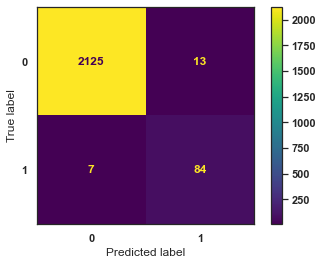

In [131]:
dtc.fit(X_train_val,y_train_val)
plot_confusion_matrix(dtc, X_test, y_test)

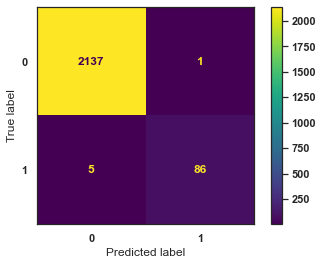

In [130]:
dtc_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(dtc_tuned, X_test, y_test)

Tuning menyebabkan turunnya FP yang berarti naiknya recall

## 6. __Predict New Players__

# Model Terbaik adalah rfc_tuned

In [94]:
rfc_tuned.fit(X,y)

Pipeline(steps=[('rfe', RFE(estimator=RandomForestClassifier(max_depth=3))),
                ('resampling', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=10, min_samples_split=7))])

In [91]:
new_players = pd.read_csv('new_players.csv').drop('Unnamed: 0', axis=1)

In [92]:
new_players

player_id   age  player_height  player_weight           college country  \
0            1  37.0         205.74     104.326160   Texas Christian     USA   
1            2  33.0         160.02      63.956472       Wake Forest     USA   
2            3  27.0         193.04      95.254320           Indiana     USA   
3            4  21.0         195.58      99.790240        Cincinnati     USA   
4            5  23.0         215.90     122.469840              None     USA   
..         ...   ...            ...            ...               ...     ...   
495        496  28.0         200.66     103.418976  Nevada-Las Vegas     USA   
496        497  28.0         200.66     107.047712        California     USA   
497        498  23.0         208.28     103.418976         Wisconsin     USA   
498        499  24.0         213.36     108.862080            DePaul     USA   
499        500  31.0         203.20     113.398000   Tennessee State     USA   

     gp   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0    70   3.0   4.2  0.7        -5.2     0.084     0.237    0.114   0.489   
1    61   5.7   2.2  5.4        -8.4     0.020     0.074    0.129   0.492   
2    36  18.8   5.6  5.2         5.6     0.018     0.154    0.278   0.519   
3    42   2.5   1.3  1.1        -4.2     0.030     0.115    0.171   0.400   
4    26   3.3   3.4  0.3        -7.8     0.069     0.221    0.112   0.551   
..   ..   ...   ...  ...         ...       ...       ...      ...     ...   
495  81  21.8  11.8  1.8         7.1     0.086     0.238    0.222   0.591   
496  78  12.8   4.4  1.6        -4.9     0.054     0.124    0.233   0.490   
497  46   4.7   2.6  0.5         0.2     0.087     0.162    0.174   0.536   
498  69   6.1   3.9  0.2        -1.7     0.099     0.140    0.146   0.598   
499  81  12.8  10.2  4.2         2.5     0.070     0.247    0.162   0.552   

     ast_pct  
0      0.069  
1      0.344  
2      0.250  
3      0.174  
4      0.037  
..       ...  
495    0.068  
496    0.099  
497    0.072  
498    0.021  
499    0.174  

[500 rows x 16 columns]

In [116]:
new_potential = rfc_tuned.predict(new_players.drop(['player_id', 'college', 'country'], axis=1))

In [118]:
new_players['potential_player'] = new_potential

In [119]:
new_players

player_id   age  player_height  player_weight           college country  \
0            1  37.0         205.74     104.326160   Texas Christian     USA   
1            2  33.0         160.02      63.956472       Wake Forest     USA   
2            3  27.0         193.04      95.254320           Indiana     USA   
3            4  21.0         195.58      99.790240        Cincinnati     USA   
4            5  23.0         215.90     122.469840              None     USA   
..         ...   ...            ...            ...               ...     ...   
495        496  28.0         200.66     103.418976  Nevada-Las Vegas     USA   
496        497  28.0         200.66     107.047712        California     USA   
497        498  23.0         208.28     103.418976         Wisconsin     USA   
498        499  24.0         213.36     108.862080            DePaul     USA   
499        500  31.0         203.20     113.398000   Tennessee State     USA   

     gp   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0    70   3.0   4.2  0.7        -5.2     0.084     0.237    0.114   0.489   
1    61   5.7   2.2  5.4        -8.4     0.020     0.074    0.129   0.492   
2    36  18.8   5.6  5.2         5.6     0.018     0.154    0.278   0.519   
3    42   2.5   1.3  1.1        -4.2     0.030     0.115    0.171   0.400   
4    26   3.3   3.4  0.3        -7.8     0.069     0.221    0.112   0.551   
..   ..   ...   ...  ...         ...       ...       ...      ...     ...   
495  81  21.8  11.8  1.8         7.1     0.086     0.238    0.222   0.591   
496  78  12.8   4.4  1.6        -4.9     0.054     0.124    0.233   0.490   
497  46   4.7   2.6  0.5         0.2     0.087     0.162    0.174   0.536   
498  69   6.1   3.9  0.2        -1.7     0.099     0.140    0.146   0.598   
499  81  12.8  10.2  4.2         2.5     0.070     0.247    0.162   0.552   

     ast_pct  potential_player  
0      0.069                 0  
1      0.344                 0  
2      0.250                 1  
3      0.174                 0  
4      0.037                 0  
..       ...               ...  
495    0.068                 0  
496    0.099                 0  
497    0.072                 0  
498    0.021                 0  
499    0.174                 0  

[500 rows x 17 columns]

In [134]:
new_players.columns

Index(['player_id', 'age', 'player_height', 'player_weight', 'college',
       'country', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'potential_player'],
      dtype='object')

In [120]:
print(f"Jumlah pemain yang berpotensi sebanyak {len(new_players[new_players['potential_player']==1])}")

Jumlah pemain yang berpotensi sebanyak 16


In [135]:
X_train_val.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

# Jumlah pemain potensial dari dataset new_players.csv adalah 16 orang